In [1]:
from miscpy.utils.sympyhelpers import *
init_printing()
import numpy as np

In [2]:
%matplotlib

Using matplotlib backend: MacOSX


In [3]:
r,I,O,w,nu,mu,a,e = symbols("r,I,Omega,omega,nu,mu,a,e",real=True,positive=True)
r2,I2,O2,w2,nu2 = symbols("r_2,I_2,Omega_2,omega_2,nu_2",real=True)
r3,I3,O3,w3,nu3 = symbols("r_3,I_3,Omega_3,omega_3,nu_3",real=True)

Define required rotation matrices ($\Omega$ rotation about $\mathbf{\hat{e}}_3$, $I$ about $\mathbf{\hat{n}}$ and $\theta$ rotation about $\mathbf{\hat{h}}$)

In [4]:
rot1 = rotMat(3,O)
rot2 = rotMat(1,I)
rot3 = rotMat(3,w)

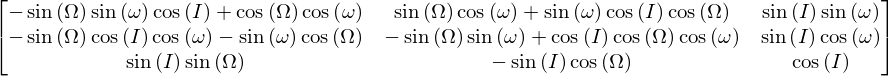

In [5]:
pCi = rot3*rot2*rot1
pCi

## Orbital Radius

In [6]:
r_p = Matrix([r*cos(nu),r*sin(nu),0])

In [7]:
r_i = pCi.transpose()*r_p

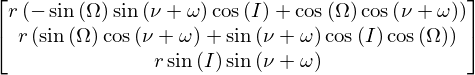

In [8]:
r_i = simplify(r_i);
r_i

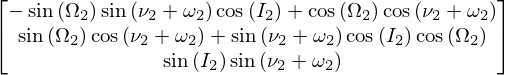

In [9]:
r2 = (r_i/r).subs([(I,I2),(w,w2),(O,O2),(nu,nu2)])
r2

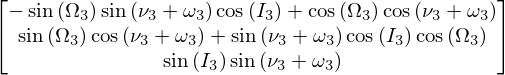

In [10]:
r3 = (r_i/r).subs([(I,I3),(w,w3),(O,O3),(nu,nu3)])
r3

In [11]:
simplify(r2.dot(r3))

In [12]:
simplify(r_i.norm()) #sanity check

## Projected Separation

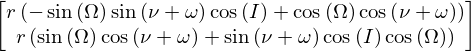

In [13]:
svec = Matrix([r_i[0], r_i[1]])
svec

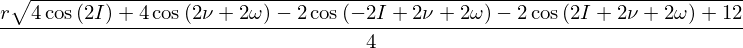

In [14]:
s = simplify(sqrt(svec.transpose().dot(svec)))
s

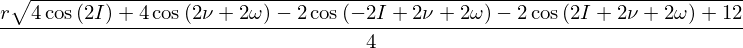

In [15]:
s = simplify(svec.norm())
s

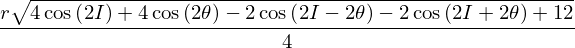

In [16]:
s.subs(2*nu+2*w,2*th)

## Phase Angle

In [17]:
beta = simplify(acos(r_i[2]/r)).subs(nu+w,th)
beta

In [18]:
thval = np.linspace(0,2*np.pi, 100)

In [19]:
betaf = lambdify((I,th),beta)
betaf

<function <lambda>>

In [20]:
plt.figure()
plt.clf()
for j in range(0,100,10):
    plt.plot(thval*180/np.pi,betaf(j*np.pi/180.0,thval)*180/np.pi,label='I = %d$^\circ$'%j)
plt.plot([0,360],[63.3, 63.3],'k--')
plt.legend()
plt.xlabel('$\\theta$ (deg)')
plt.ylabel('$\\beta$ (deg)')
plt.xlim([0,360])
plt.savefig('beta_plot1.png')

NameError: name 'plt' is not defined

## Orbital Velocity

In [ ]:
v_p = sqrt(mu/(a*(1 - e**2)))*Matrix([-sin(nu),(e+cos(nu)),0])
simplify(v_p)

In [ ]:
v_i = pCi.transpose()*v_p
v_i

In [ ]:
simplify(v_i[2]) #this is RV

In [ ]:
simplify(v_i)